In [21]:
# Ugly code warning
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [60]:
mu1, cov1 = [4, -6], [[1, 2], [2, 6]]
mu2, cov2 = [-2, 1], [[3, -2], [-2, 4]]
mu3, cov3 = [10, 1], [[1, 0], [0, 7]]
mu4, cov4 = [-10, -4], [[5, 1], [1, 2]]
test = np.random.multivariate_normal(mu1, cov1, 1000)
test = np.concatenate((test, np.random.multivariate_normal(mu2, cov2, 600)), axis=0)
test = np.concatenate((test, np.random.multivariate_normal(mu3, cov3, 1200)), axis=0)
test = np.concatenate((test, np.random.multivariate_normal(mu4, cov4, 800)), axis=0)

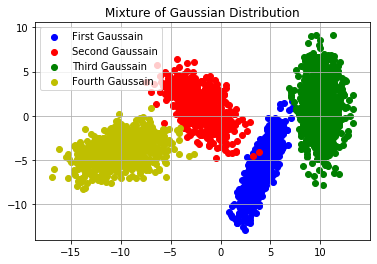

In [61]:
cluster1 = test[:1000, :]
cluster2 = test[1000:1600, :]
cluster3 = test[1600:2800, :]
cluster4 = test[2800:, :]

plt.figure()
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='b', label='First Gaussain')
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='r', label='Second Gaussain')
plt.scatter(cluster3[:, 0], cluster3[:, 1], color='g', label='Third Gaussain')
plt.scatter(cluster4[:, 0], cluster4[:, 1], color='y', label='Fourth Gaussain')
plt.title('Mixture of Gaussian Distribution')
plt.legend()
plt.grid()
plt.show()

In [71]:
np.random.shuffle(test)
kmeans = KMeans(n_clusters=4).fit(test)
kmeans.labels_

array([0, 3, 2, ..., 0, 1, 2], dtype=int32)

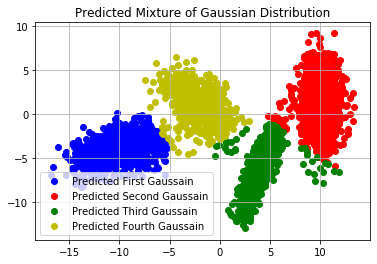

In [72]:
cluster1_kmeans = np.array([test[i, :] for i in range(len(test)) if kmeans.labels_[i] == 0])
cluster2_kmeans = np.array([test[i, :] for i in range(len(test)) if kmeans.labels_[i] == 1])
cluster3_kmeans = np.array([test[i, :] for i in range(len(test)) if kmeans.labels_[i] == 2])
cluster4_kmeans = np.array([test[i, :] for i in range(len(test)) if kmeans.labels_[i] == 3])

plt.figure()
plt.scatter(cluster1_kmeans[:, 0], cluster1_kmeans[:, 1], color='b', label='Predicted First Gaussain')
plt.scatter(cluster2_kmeans[:, 0], cluster2_kmeans[:, 1], color='r', label='Predicted Second Gaussain')
plt.scatter(cluster3_kmeans[:, 0], cluster3_kmeans[:, 1], color='g', label='Predicted Third Gaussain')
plt.scatter(cluster4_kmeans[:, 0], cluster4_kmeans[:, 1], color='y', label='Predicted Fourth Gaussain')
plt.title('Predicted Mixture of Gaussian Distribution')
plt.legend()
plt.grid()
plt.show()